<a id='Q0'></a>
<center> <h1> Alnatura - Migros and Vegan Restaurants in Zürich</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>....</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> The aim is to find possible locations for Migros-Alnatura</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data collection, Zürich Tourism API.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

**Migros Business Model & Business Units**

Migros is focused on improving the quality of life of its customers. All Migros companies are obliged to base their actions on this guiding principle.
The Migros Group is a diversified and vertically integrated group of companies with retail as the core business. With its products and services, it covers the everyday needs of all sections of society.

The Group is divided into five strategic business units:

Cooperative Retailing represents the core business. It consists of the activities of the ten regional Migros Cooperatives. These operate the super/hypermarkets under the Migros brand, the specialist markets Do it + Garden, Melectronics, Micasa, SportXX, the Swiss Obi DIY stores and the **Alnatura format in Switzerland**, as well as the leisure facilities, fitness centres, restaurants and take-aways, and the Club Schools. It also includes the marketing activities of the FMC and the activities of Medbase in the health sector.
The strategic business unit Commerce covers all other retail formats that are not operated by the Cooperatives. These include the online retailer Digitec Galaxus, the discounter Denner, the specialist markets of Ex Libris, the energy company Migrol and the migrolino convenience stores.
The industrial companies of the strategic business unit Migros-Industry fulfil a dual role: first, they develop and manufacture innovative own-brand products for Migros that offer Swiss quality at fair prices; second, they sell products and services to third-party customers in Switzerland and abroad.
The strategic business units Financial Services and Travel offer further options and services for Migros customers.
In addition, the Migros Group also includes service entities that provide services for all areas, such as the national distribution centres, Migros IT Services and the SQTS test laboratory, and corporate functions that handle interdisciplinary tasks, such as in the areas of finance, HR, quality management and compliance.

[Migros Official](https://report.migros.ch/2020/en/overview-of-migros/business-model-business-units/)


In accordance with the migros business plan, the principle aim was to define locations in Zürich city, where Alnatura could bring more profit.

This notebook presents the process to identify possible **Alnatura** (a coopretaive retail branch of Migros) places in Zürich.


<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [2]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...
%load_ext lab_black
# ... or jupyter notebook
# %load_ext nb_black

### Packages

In [1]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import folium
import branca
import anytree

from IPython import display

/opt/anaconda3/envs/dst/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Custom classes and functions

In [4]:
import sys
SCRIPT_DIR = "../src"
sys.path.append(SCRIPT_DIR)

In [5]:
from template_module import my_function_name

### Global Parameters Setting

In [6]:
plt.style.use("seaborn")

### User-Dependent Variables

In [1]:
url_features = ".../data/train_features.csv"  # path to data file

<a id='P1'></a>
## [Part one: Alnatura](#P0)

Apart from selling bio-products, Alnatura is known for its large sortiment of vegan products. 

**Number of Vegans is Rising!**

According to the most recent and most comprehensive survey in Switzerland (MACH Consumer), the number of vegans has doubled within a year. Today around 38,000 vegans and over a quarter of a million vegetarians live in Switzerland and the Principality of Liechtenstein. One percent of women say they are vegan.

[Source](https://www.swissveg.ch/2021_10_Anzahl_Veganer_Vegetarier?language=de)


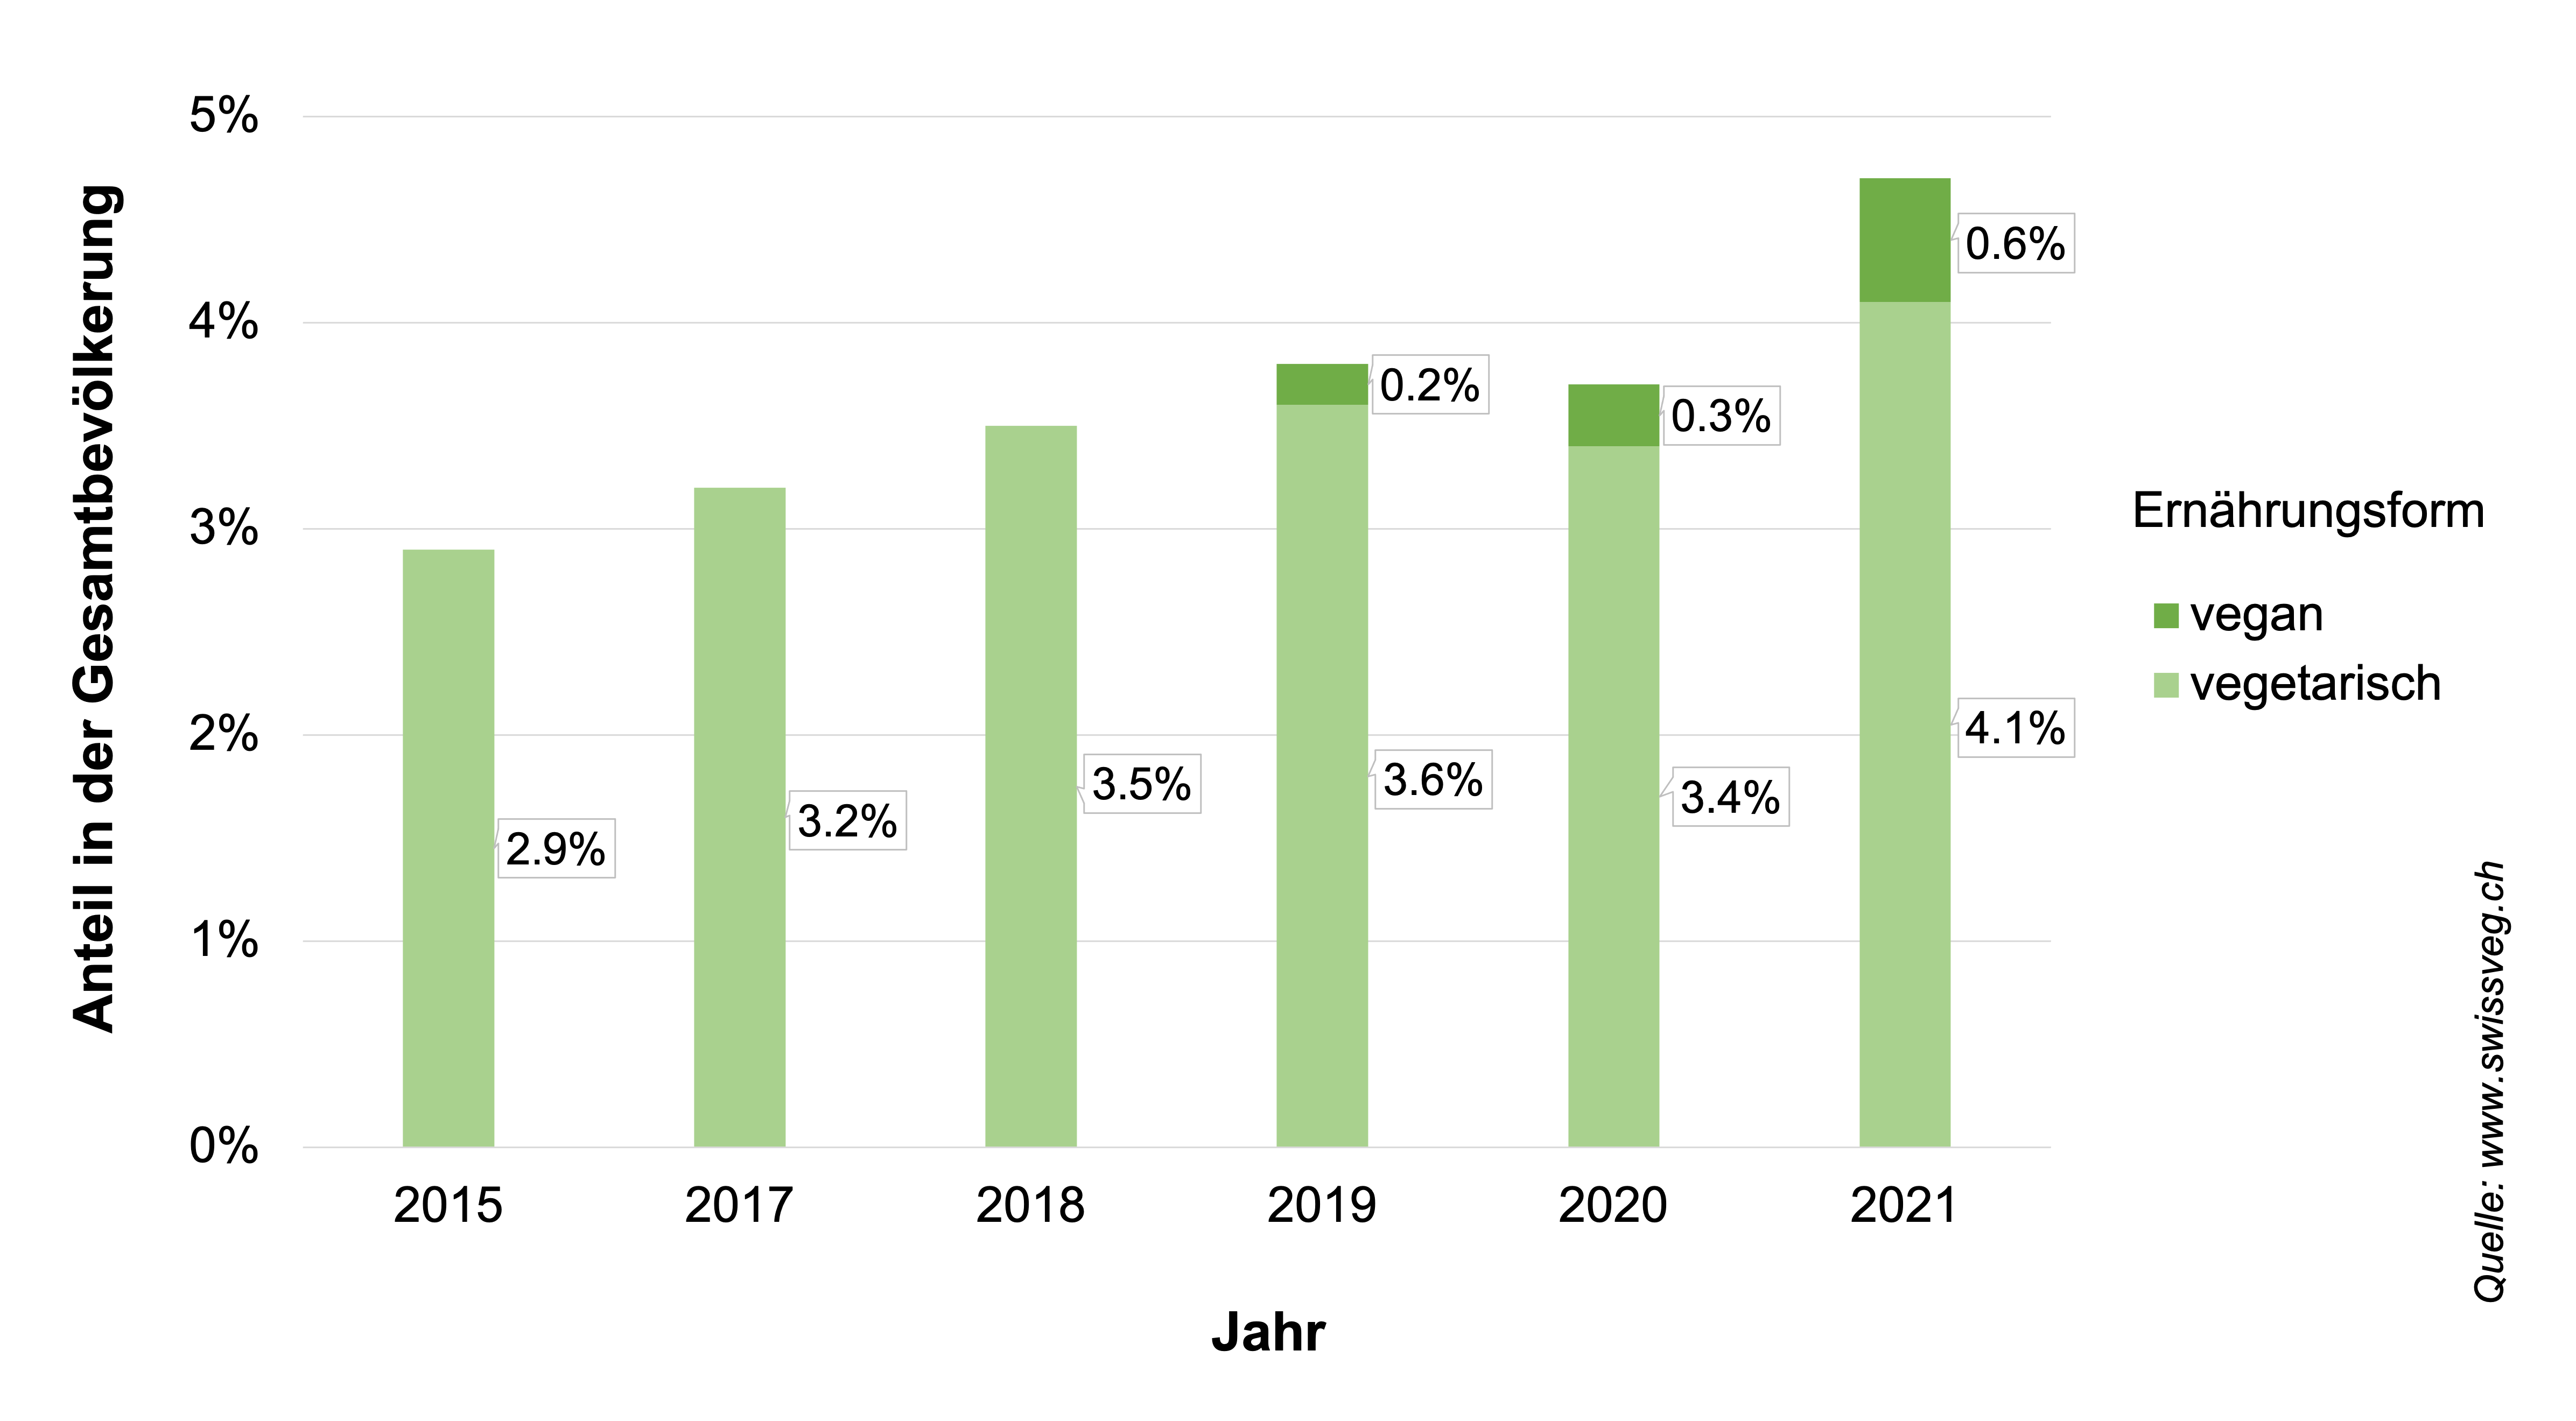

In [4]:
display.Image("https://www.swissveg.ch/sites/swissveg.ch/files/bilder/1%20%282%29.png")

### Strategy

Thus, the strategy is to define vegan & vegetarian restaurants in the city and offer near by Migros supermarkets that sell Alnatura products

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 Vegan and Vegeterian Restaurants in Zürich](#P0)

In order to identify the vegan restaurant locations in Zürich, we use the Zurich Tourism Open Data Portal. The portal enables to find publicly accessible data sets on sights, excursion destinations, restaurants and accommodation in Zurich and the surrounding region.

[Zürich Tourism Open Data Portal](https://zt.zuerich.com/de/open-data)

Example usages of the API:

[Source Code](https://github.com/opendatazurich/opendatazurich.github.io/blob/master/zt-api/ZuerichTourismusAPI-Beispiele.ipynb)

In [5]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.zuerich.com nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False
if not SSL_VERIFY:
    import urllib3

    urllib3.disable_warnings()


def get_de(field):
    try:
        return field["de"]
    except (KeyError, TypeError):
        try:
            return field["en"]
        except (KeyError, TypeError):
            return field

# Categories in the API


In [ ]:
from anytree import Node, RenderTree
from urllib.parse import urljoin

In [ ]:
headers = {'Accept': 'application/json'}
base_url = 'https://www.zuerich.com'
data_url = urljoin(base_url, '/data')
r = requests.get(data_url, headers=headers, verify=SSL_VERIFY)
data = r.json()
data

[{'id': '71',
  'parent': '0',
  'swissId': '',
  'name': {'de': 'Übernachten',
   'en': 'Accommodation',
   'fr': 'Logement',
   'it': 'Ospitalità'},
  'path': '/data?id=71'},
 {'id': '72',
  'parent': '73',
  'swissId': '',
  'name': {'de': 'Sehenswürdigkeiten',
   'en': 'Attractions',
   'fr': 'Attractions touristiques',
   'it': 'Attrazioni turistiche'},
  'path': '/data?id=72'},
 {'id': '73',
  'parent': '0',
  'swissId': '',
  'name': {'de': 'Orte', 'en': 'Place', 'fr': 'Lieu', 'it': 'Località'},
  'path': '/data?id=73'},
 {'id': '74',
  'parent': '0',
  'swissId': '',
  'name': {'de': 'Gastronomie',
   'en': 'Gastronomy',
   'fr': 'Gastronomie',
   'it': 'Gastronomia'},
  'path': '/data?id=74'},
 {'id': '75',
  'parent': '0',
  'swissId': '',
  'name': {'de': 'Events',
   'en': 'Events',
   'fr': 'Manifestations',
   'it': 'Eventi'},
  'path': '/data?id=75'},
 {'id': '76',
  'parent': '71',
  'swissId': '',
  'name': {'de': 'Hotel', 'en': 'Hotels', 'fr': 'Hôtels', 'it': 'Hotel'}

#### Calling all Elements with the tag "gastronomy" from the API:

In [6]:
headers = {"Accept": "application/json"}
r = requests.get(
    "https://www.zuerich.com/de/data?id=197", headers=headers, verify=SSL_VERIFY
)

#### Turn JSON Data from API into Python Dictionary:

In [7]:
data = r.json()
data

[{'@context': 'https://schema.org/',
  '@type': 'LocalBusiness',
  'identifier': '1001172',
  'copyrightHolder': {'de': 'Zürich Tourismus www.zuerich.com',
   'en': 'Zurich Tourism www.zuerich.com',
   'it': 'Zürich Tourismo www.zuerich.com',
   'fr': 'Zürich Tourisme www.zuerich.com'},
  'license': 'BY-SA',
  'category': {'Restaurants': {'swissId': ''},
   'Cuisine': {'swissId': ''},
   'Fish': {'swissId': ''},
   'Vegetarian': {'swissId': ''},
   'Swiss Specialties': {'swissId': ''},
   'Zürcher Geschnetzeltes': {'swissId': ''}},
  'name': {'de': 'Fischerstube Zürihorn',
   'en': 'Fischerstube Zürihorn',
   'fr': 'Fischerstube Zürihorn',
   'it': 'Fischerstube Zürihorn'},
  'disambiguatingDescription': {'de': 'Das legendäre Restaurant ist vom See aus gut sichtbar. \r\n',
   'en': 'The legendary restaurant is clearly visible from the lake.\r\n',
   'fr': 'Ce restaurant légendaire est parfaitement visible depuis le lac.\r\n',
   'it': 'Il leggendario ristorante si vede bene dal lago.\r

In [8]:
# Datas have many language options, the following returns only the German ones:

de_data = [{k: get_de(v) for (k, v) in f.items()} for f in data]
# de_data

In [9]:
# Datas into a DataFrame:

df = pd.DataFrame(de_data)
df

,@context,@type,identifier,copyrightHolder,license,category,name,disambiguatingDescription,description,titleTeaser,...,price,photo,dateModified,opens,openingHours,openingHoursExceptions,specialOpeningHoursSpecification,address,geoCoordinates,place
0,https://schema.org/,LocalBusiness,1001172,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Cuisine': {'...",Fischerstube Zürihorn,Das legendäre Restaurant ist vom See aus gut s...,<p>Die legendäre Fischerstube ist viel mehr al...,Fischerstube Zürihorn,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,15.12.2021 10:19,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa,Su 11:30-23:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.3530142, 'longitude': 8.5506015}",[]
1,https://schema.org/,LocalBusiness,556378,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Online Booki...",The Butcher & his Daughter,The Butcher & his Daughter ist die Anlaufstell...,<p>The Butcher ist inzwischen stadtbekannt. Be...,The Butcher & his Daughter,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 11:00-23:00, Su 12:00-22:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.373995, 'longitude': 8.525455}",[]
2,https://schema.org/,LocalBusiness,555223,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Café Sprössling,Das rein vegane Café ist die zweite Filiale de...,"<p>Ob Donuts, Kaffee, Granolas oder gar Burger...",Café Sprössling,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,19.11.2021 09:15,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 9:00-18:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.391957, 'longitude': 8.539058}",[]
3,https://schema.org/,LocalBusiness,554922,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Kraftwerk Café & Restaurant,In der ehemaligen Transformatorenhalle treffen...,<p>Das Gebäude des ehemaligen Unterwerks Selna...,Kraftwerk Restaurant,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We 8:00-22:00, Sa 14:00-22:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.37214, 'longitude': 8.53193}",[]
4,https://schema.org/,LocalBusiness,313421,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Cuisine': {'...",Weisser Wind – Zunfthaus und Restaurant,Im Herzen des Zürcher Oberdorfs verbindet der ...,<p>Das Restaurant und Zunfthaus Weisser Wind i...,Weisser Wind,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr 11:00-14:00, Mo,Tu,We,Th,Fr,Sa...",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.368861, 'longitude': 8.545618}",[]
5,https://schema.org/,LocalBusiness,195427,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Hiltl Langstrasse,Das älteste vegetarische Restaurant der Welt h...,<p>Das älteste vegetarische Restaurant der Wel...,Hiltl Langstrasse,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,17.12.2021 09:10,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 11:00-14:30, Mo,Tu,We,Th,Fr...",None,Vorübergehend geschlossen,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.377842, 'longitude': 8.526763}",[]
6,https://schema.org/,LocalBusiness,185302,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Kosmos Bistro,Im Kosmos Bistro gibt es passend zum Kulturhau...,<p>Das «Kosmos» hat der Europaallee Leben eing...,Kosmos Bistro,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,21.07.2021 09:16,"[

In [11]:
df.iloc[0:1]

,@context,@type,identifier,copyrightHolder,license,category,name,disambiguatingDescription,description,titleTeaser,...,price,photo,dateModified,opens,openingHours,openingHoursExceptions,specialOpeningHoursSpecification,address,geoCoordinates,place
0,https://schema.org/,LocalBusiness,1001172,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Cuisine': {'...",Fischerstube Zürihorn,Das legendäre Restaurant ist vom See aus gut s...,<p>Die legendäre Fischerstube ist viel mehr al...,Fischerstube Zürihorn,...,None,[{'url': 'https://www.zuerich.com/sites/defaul...,15.12.2021 10:19,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa,Su 11:30-23:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...","{'latitude': 47.3530142, 'longitude': 8.5506015}",[]


In [10]:
# veg_df = df.explode("geoCoordinates")

vegat_df = pd.concat(
    [df.drop(["geoCoordinates"], axis=1), df["geoCoordinates"].apply(pd.Series)], axis=1
)
vegat_df

,@context,@type,identifier,copyrightHolder,license,category,name,disambiguatingDescription,description,titleTeaser,...,photo,dateModified,opens,openingHours,openingHoursExceptions,specialOpeningHoursSpecification,address,place,latitude,longitude
0,https://schema.org/,LocalBusiness,1001172,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Cuisine': {'...",Fischerstube Zürihorn,Das legendäre Restaurant ist vom See aus gut s...,<p>Die legendäre Fischerstube ist viel mehr al...,Fischerstube Zürihorn,...,[{'url': 'https://www.zuerich.com/sites/defaul...,15.12.2021 10:19,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa,Su 11:30-23:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.353014,8.550602
1,https://schema.org/,LocalBusiness,556378,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Online Booki...",The Butcher & his Daughter,The Butcher & his Daughter ist die Anlaufstell...,<p>The Butcher ist inzwischen stadtbekannt. Be...,The Butcher & his Daughter,...,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 11:00-23:00, Su 12:00-22:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.373995,8.525455
2,https://schema.org/,LocalBusiness,555223,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Café Sprössling,Das rein vegane Café ist die zweite Filiale de...,"<p>Ob Donuts, Kaffee, Granolas oder gar Burger...",Café Sprössling,...,[{'url': 'https://www.zuerich.com/sites/defaul...,19.11.2021 09:15,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 9:00-18:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.391957,8.539058
3,https://schema.org/,LocalBusiness,554922,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Kraftwerk Café & Restaurant,In der ehemaligen Transformatorenhalle treffen...,<p>Das Gebäude des ehemaligen Unterwerks Selna...,Kraftwerk Restaurant,...,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We 8:00-22:00, Sa 14:00-22:00]",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.372140,8.531930
4,https://schema.org/,LocalBusiness,313421,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Cuisine': {'...",Weisser Wind – Zunfthaus und Restaurant,Im Herzen des Zürcher Oberdorfs verbindet der ...,<p>Das Restaurant und Zunfthaus Weisser Wind i...,Weisser Wind,...,[{'url': 'https://www.zuerich.com/sites/defaul...,20.07.2021 17:04,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr 11:00-14:00, Mo,Tu,We,Th,Fr,Sa...",None,None,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.368861,8.545618
5,https://schema.org/,LocalBusiness,195427,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Hiltl Langstrasse,Das älteste vegetarische Restaurant der Welt h...,<p>Das älteste vegetarische Restaurant der Wel...,Hiltl Langstrasse,...,[{'url': 'https://www.zuerich.com/sites/defaul...,17.12.2021 09:10,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[Mo,Tu,We,Th,Fr,Sa 11:00-14:30, Mo,Tu,We,Th,Fr...",None,Vorübergehend geschlossen,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.377842,8.526763
6,https://schema.org/,LocalBusiness,185302,Zürich Tourismus www.zuerich.com,BY-SA,"{'Restaurants': {'swissId': ''}, 'Vegetarian':...",Kosmos Bistro,Im Kosmos Bistro gibt es passend zum Kulturhau...,<p>Das «Kosmos» hat der Europaallee Leben eing...,Kosmos Bistro,...,[{'url': 'https://www.zuerich.com/sites/defaul...,21.07.2021 09:16,"[Monday, Tuesday, Wednesday, Thursday, Friday,...",None,None,<p><strong>Bistro</strong></p>\r\n\r\n<p>Monta...,"{'addressCountry': 'CH', 'addressLocality': 'Z...",[],47.379988,8.529103
7,https://schema.org/,LocalBusine

# Visualization of the location datas in Maps

folium is a Python wrapper for OpenLayers. The following code creates a new map and uses the overview plan as a background (integrated as a WMS).

In [14]:
m = folium.Map(location=[47.36, 8.53], zoom_start=13, tiles=None)
folium.raster_layers.WmsTileLayer(
    url="https://www.ogd.stadt-zuerich.ch/wms/geoportal/Basiskarte_Zuerich_Raster",
    layers="Basiskarte Zürich Raster",
    name="Zürich - Basiskarte",
    fmt="image/png",
    overlay=False,
    control=False,
    autoZindex=False,
).add_to(m)

In [15]:
gastro = folium.FeatureGroup("Restaurants")
isna = df.isna()
for i, row in df.iterrows():
    print(row["geoCoordinates"])
    print(row["name"])
    geo = row["geoCoordinates"]
    if not isna.geoCoordinates[i]:
        print(
            "%s, %s, %s"
            % (float(geo["latitude"]), float(geo["longitude"]), row["name"])
        )

        try:
            photo = row["photo"][0]["url"]
            photo_html = f'<img src="{photo}" style="width:300px">'
        except (IndexError, KeyError, TypeError):
            photo_html = ""
        html = (
            f'<h2>{row["name"]}</h2>'
            f"{photo_html}"
            f'<p>{row["disambiguatingDescription"]}</p>'
        )
        # popup = folium.Popup(branca.element.IFrame(html=html, width=420))
        gastro.add_child(
            folium.Marker(
                location=[float(geo["latitude"]), float(geo["longitude"])], popup=html
            )
        )
m.add_child(gastro)

{'latitude': 47.3530142, 'longitude': 8.5506015}
Fischerstube Zürihorn
47.3530142, 8.5506015, Fischerstube Zürihorn
{'latitude': 47.373995, 'longitude': 8.525455}
The Butcher & his Daughter
47.373995, 8.525455, The Butcher & his Daughter
{'latitude': 47.391957, 'longitude': 8.539058}
Café Sprössling
47.391957, 8.539058, Café Sprössling
{'latitude': 47.37214, 'longitude': 8.53193}
Kraftwerk Café & Restaurant
47.37214, 8.53193, Kraftwerk Café & Restaurant
{'latitude': 47.368861, 'longitude': 8.545618}
Weisser Wind – Zunfthaus und Restaurant
47.368861, 8.545618, Weisser Wind – Zunfthaus und Restaurant
{'latitude': 47.377842, 'longitude': 8.526763}
Hiltl Langstrasse
47.377842, 8.526763, Hiltl Langstrasse
{'latitude': 47.379988, 'longitude': 8.529103}
Kosmos Bistro
47.379988, 8.529103, Kosmos Bistro
{'latitude': 47.3790236, 'longitude': 8.5410057}
Restaurant Spitz
47.3790236, 8.5410057, Restaurant Spitz
{'latitude': 47.374102, 'longitude': 8.543798}
Enzian eat&art
47.374102, 8.543798, Enzia

In [45]:
#This creates a new dataframe from the data
vegat_df.to_csv('veggie.csv')

<a id='CL'></a>
## [Conclusion](#P0)

Now we have the locations for the vegan restaurants. This process can be repeated for any category in the Tourism API

In [16]:
folium.LayerControl().add_to(m)
m

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>